In [184]:
data = pd.read_csv('StudentsPerformance.csv')
for i in range(9):
    temp = pd.read_csv('http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000')
    data = data.append(temp)
#data = pd.read_csv('StudentsPerformance.csv')
#print(data.head())
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      stan

In [205]:
import pandas as pd
import numpy as np
import csv

data = pd.read_csv('StudentsPerformance.csv')
for i in range(19):
    temp = pd.read_csv('http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000')
    data = data.append(temp)
#data = pd.read_csv('StudentsPerformance.csv')
#print(data.head())


old_data = data

numeric_data = data.replace(['male', 'female'], [0,1])
#numeric_data = numeric_data.replace(['group A', 'group B', 'group C', 'group D', 'group E'], [0,1,2,3,4])
numeric_data = numeric_data.replace(['some high school', 'high school', 'some college', "associate's degree"
                                     , "bachelor's degree", "master's degree"], [0,1,2,3,4,5])
numeric_data = numeric_data.replace(['free/reduced', 'standard'], [0,1])
numeric_data = numeric_data.replace(['none', 'completed'], [0,1])
numeric_data = numeric_data.values

#save scores in new df
numeric_scores = numeric_data[:,5:8]

# add race columns
features = np.zeros((len(numeric_data),5))
numeric_data = np.append(numeric_data,features,1)
j=1
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'group A':
        numeric_data[i][8:13] = [1,0,0,0,0]
    if numeric_data[i][j] == 'group B':
        numeric_data[i][8:13] = [0,1,0,0,0]
    if numeric_data[i][j] == 'group C':
        numeric_data[i][8:13] = [0,0,1,0,0]
    if numeric_data[i][j] == 'group D':
        numeric_data[i][8:13] = [0,0,0,1,0] 
    if numeric_data[i][j] == 'group E':
        numeric_data[i][8:13] = [0,0,0,0,1] 


        
#eliminate original race columns
numeric_data = np.delete(numeric_data, 1, 1)
numeric_data.astype(float)


#eliminate individual scores
numeric_data = np.delete(numeric_data,4,1)
numeric_data = np.delete(numeric_data,4,1)
numeric_data = np.delete(numeric_data,4,1)
    

combined_score = []
for i in range(len(numeric_scores[:, 0])):
    score = numeric_scores[i, 0]+numeric_scores[i, 1]+numeric_scores[i, 2]
    combined_score.append(score)

combined_score_df = pd.DataFrame({'combined_score': combined_score})
#numeric_data.join(combined_score_df)
#numeric_data = np.append(numeric_data, combined_score_df, axis=1)
#print(numeric_data)

threshold = 210 #average of 70% per test

passed = []
for i in range(len(numeric_scores[:, 0])):
    temp = combined_score[i]
    if(temp>=threshold):
        passed.append(1)
    else:
        passed.append(0)

passed_df = pd.DataFrame({'passed': passed})
#numeric_data.join(combined_score_df)
#numeric_data = np.append(numeric_data, passed_df, axis=1)
#print(passed)

X = numeric_data
y = passed_df


Metric score:  0.6718118447083101
Precision:  0.6322252171308775
Recall:  0.6903204708960105
Accuracy:  0.6704545454545454


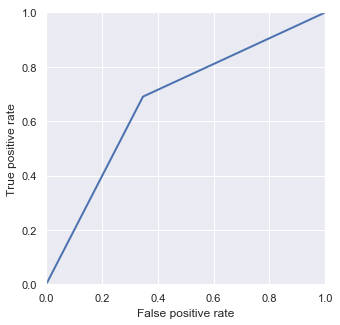

In [268]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

X = numeric_data
#print(X)
y = passed_df
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)
predictions_test = clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test, sample_weight=None)
print("Metric score: ", metrics.roc_auc_score(y_test, predictions_test))

%matplotlib inline  
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

print("Precision: ", metrics.precision_score(y_test,predictions_test))
print("Recall: ", metrics.recall_score(y_test,predictions_test))
print("Accuracy: ", metrics.accuracy_score(y_test,predictions_test))



In [269]:
print(len(data))

20000


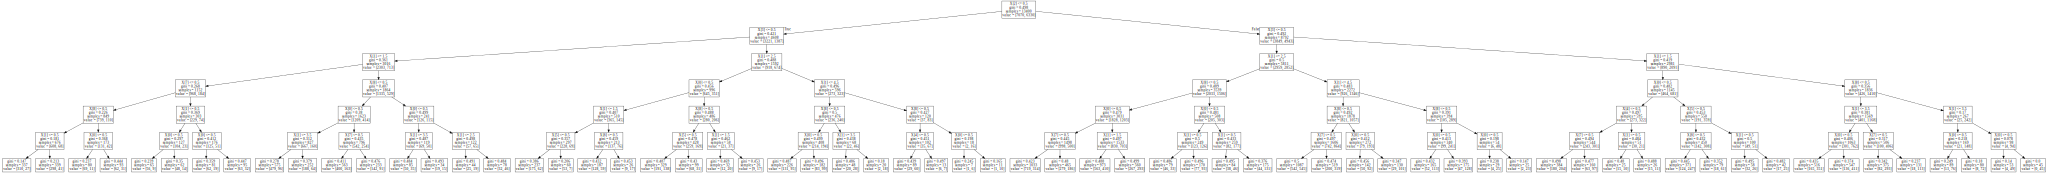

In [274]:
import graphviz as g
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from subprocess import call
from graphviz import Source
from IPython.display import display
from sklearn.datasets import load_wine
from IPython.display import SVG


graph = Source(tree.export_graphviz(clf, out_file=None))
display(SVG(graph.pipe(format='svg')))

Metric score:  0.6718118447083101
Metric score:  0.6727695201264172
Metric score:  0.6724191510710122


(0, 1)

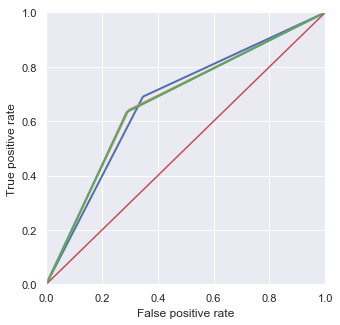

In [213]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)
predictions_test = clf.predict(X_test)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, predictions_test, sample_weight=None)
print("Metric score: ", metrics.roc_auc_score(y_test, predictions_test))

clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train,y_train)
predictions_test = clf.predict(X_test)
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, predictions_test, sample_weight=None)
print("Metric score: ", metrics.roc_auc_score(y_test, predictions_test))

clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)
predictions_test = clf.predict(X_test)
fpr4, tpr4, thresholds = metrics.roc_curve(y_test, predictions_test, sample_weight=None)
print("Metric score: ", metrics.roc_auc_score(y_test, predictions_test))


x = np.linspace(0, 10, 1000)
%matplotlib inline  
plt.figure(figsize=(5,5))
plt.plot(fpr2,tpr2,linewidth=2.0)
plt.plot(fpr3,tpr3,linewidth=2.0)
plt.plot(fpr4,tpr4,linewidth=2.0)
plt.plot(x, x + 0, linestyle='solid')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])


In [214]:
# Neural Net
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from PIL import ImageOps
import numpy as np
from matplotlib.pyplot import imshow
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("white")
sns.set_color_codes("dark")

from keras.utils import np_utils


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [215]:
X = numeric_data
#print(X)
y = passed_df
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

num_classes = y_test.shape[1]

In [216]:
print(X_train.shape)

(13400, 9)


In [262]:

model = Sequential()

model.add(Dense(32,input_dim=9))
#model.add(Dense(64))
#model.add(Dense(128))
#model.add(Dense(64))
#model.add(Dense(32))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [263]:
accuracy = []
train_percent = 0.01
datalen = 20000
iter = 50
for i in range(iter):
  model.fit(X_train[i*int(datalen*train_percent):(i+1)*int(datalen*train_percent)], y_train[i*int(datalen*train_percent):(i+1)*int(datalen*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])

Text(0, 0.5, 'accuracy on the test set')

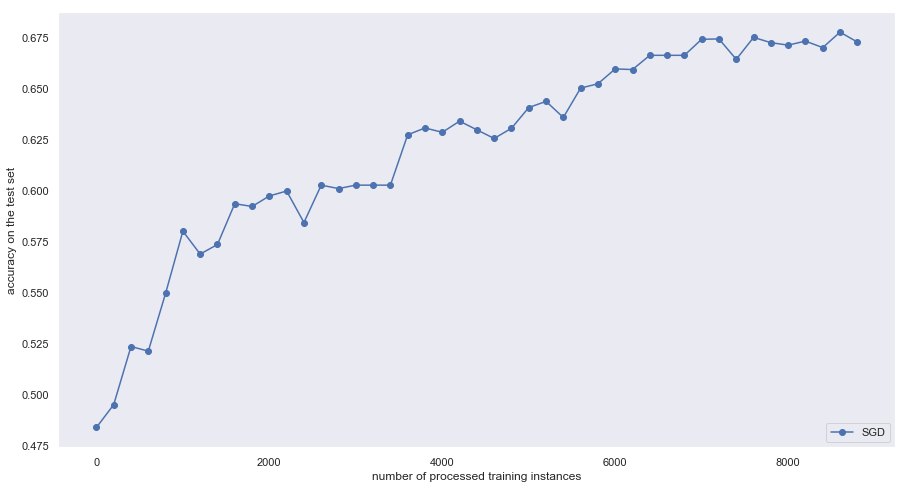

In [277]:

model = Sequential()

model.add(Dense(32,input_dim=9))
#model.add(Dense(64))
#model.add(Dense(128))
#model.add(Dense(64))
#model.add(Dense(32))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

accuracy = []
train_percent = 0.01
datalen = 20000
iter = 45
for i in range(iter):
  model.fit(X_train[i*int(datalen*train_percent):(i+1)*int(datalen*train_percent)], y_train[i*int(datalen*train_percent):(i+1)*int(datalen*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracy.append(score[1])

X = np.arange(iter)
plt.figure(figsize=(15,8))
plt.plot(X*int(train_percent*datalen),accuracy,"o-",label="SGD")
plt.legend(loc=4)
plt.grid()
plt.xlabel("number of processed training instances")
plt.ylabel("accuracy on the test set")

In [228]:
model.fit(X_train, y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

Epoch 1/10
13400/13400 [==============================] - 1s 60us/step - loss: 0.6072 - acc: 0.6683
Epoch 2/10
13400/13400 [==============================] - 1s 57us/step - loss: 0.6069 - acc: 0.6701
Epoch 3/10
13400/13400 [==============================] - 1s 57us/step - loss: 0.6062 - acc: 0.6712
Epoch 4/10
13400/13400 [==============================] - 1s 56us/step - loss: 0.6066 - acc: 0.6676
Epoch 5/10
13400/13400 [==============================] - 1s 57us/step - loss: 0.6062 - acc: 0.6663
Epoch 6/10
13400/13400 [==============================] - 1s 56us/step - loss: 0.6054 - acc: 0.6707
Epoch 7/10
13400/13400 [==============================] - 1s 57us/step - loss: 0.6052 - acc: 0.6720
Epoch 8/10
13400/13400 [==============================] - 1s 58us/step - loss: 0.6050 - acc: 0.6681
Epoch 9/10
13400/13400 [==============================] - 1s 58us/step - loss: 0.6055 - acc: 0.6682
Epoch 10/10
13400/13400 [==============================] - 1s 57us/step - loss: 0.6040 - acc: 0.6689